### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?

# Create a df to determine whether there are missing values.
reviews_na = reviews[reviews.isna().any(axis=1)]

# View the shape of the DataFrame.
reviews_na.shape

(0, 11)

In [4]:
reviews_na

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary


There don't appear to be any missing values

### Explore the data


In [5]:
# Identify duplicate rows
reviews[reviews.duplicated()]

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary


There don't appear to be any duplicated rows that need removing

In [6]:
# Show columns
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

In [7]:
# Determine the metadata of the data set.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


### Metadata provided as text file:
turtle_reviews.csv 

    Column            Sample value                 Interpretation of columns
    gender            male or female               The gender of the customer.
    age               number                       Age of the customer in years.
    remuneration      number                       Total income per customer per year
       (k£)                                           in pounds, where k=1000.                           
    spending_score    number                       A score is assigned to the customer by Turtle 
      (1-100)                                         Games based on the customer’s spending nature
                                                      and behaviour. The value ranges between 1 and
                                                      100.
    loyalty_points    number                       A score based on the point value of the purchase,
                                                  converting the monetary value to point value,
                                                  and the point value of an action (purchase).
    education         graduate                     Level of qualification that the customer obtained.
                                                  For example:
                                                    Diploma: completed school
                                                    Graduate: undergraduate degree
                                                    Postgraduate: postgraduate degree
                                                    PhD degree.
    language          EN                           All the reviews were in English.
    platform          Web                          All the reviews were obtained from the website
                                                  of Turtle Games.
    product           number                       Unique code allocated to product based on the
                                                  item description.
    review            When it comes to             Online reviews submitted by customers who
                    a DM’s screen, ...            purchased and used the products.
    summary           The fact that 50% of         Summary of the customer’s review 
                    this ...                   


### Descriptive statistics for reviews df.

In [8]:
reviews.describe().round(2)

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,39.49,48.08,50.00,1578.03,4320.52
std,13.57,23.12,26.09,1283.24,3148.94
min,17.00,12.30,1.00,25.00,107.00
25%,29.00,30.34,32.00,772.00,1589.25
50%,38.00,47.15,50.00,1276.00,3624.00
75%,49.00,63.96,73.00,1751.25,6654.00
max,72.00,112.34,99.00,6847.00,11086.00


## 2. Drop columns

In [9]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [10]:
# Rename the column headers.
reviews.rename({'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'}, axis=1, inplace=True)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
reviews.to_csv('reviews_cleaned.csv', index=False)

In [12]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('reviews_cleaned.csv')

# View the DataFrame.
reviews_clean.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### Firstly, look at distribution of variables being considered

#### Loyalty Score

In [13]:
plt.style.use(['default'])

(array([444., 724., 432.,  55., 103., 116.,  51.,  52.,  20.,   3.]),
 array([  25. ,  707.2, 1389.4, 2071.6, 2753.8, 3436. , 4118.2, 4800.4,
        5482.6, 6164.8, 6847. ]),
 <BarContainer object of 10 artists>)

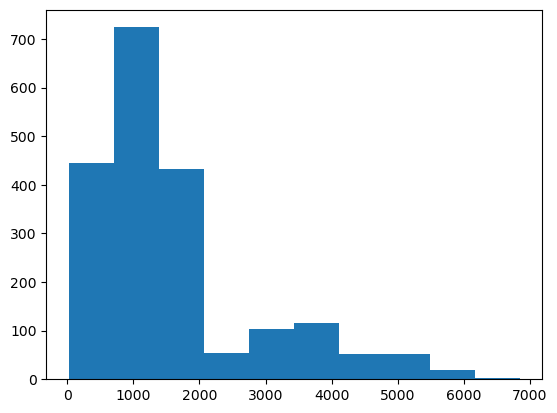

In [14]:
# Create histogram
plt.hist(reviews_clean['loyalty_points'])

Loyalty Score is not normally distributed

#### Spending Score

(array([163., 215., 100., 171., 332., 355., 122., 239., 143., 160.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

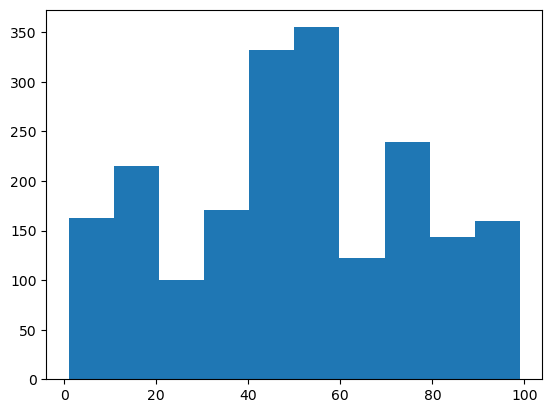

In [15]:
plt.hist(reviews_clean['spending_score'])

Spending Score is not normally distributed

#### Remuneration

(array([322., 235., 287., 372., 224., 297.,  88.,  80.,  55.,  40.]),
 array([ 12.3  ,  22.304,  32.308,  42.312,  52.316,  62.32 ,  72.324,
         82.328,  92.332, 102.336, 112.34 ]),
 <BarContainer object of 10 artists>)

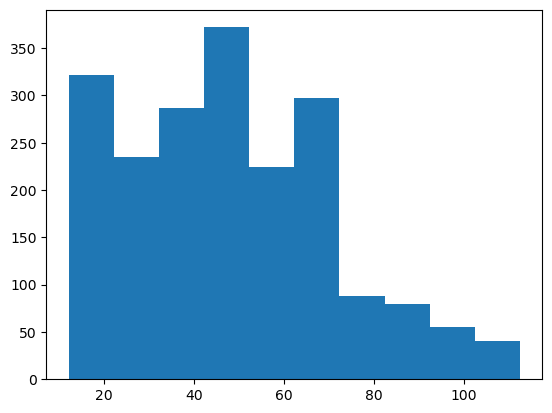

In [16]:
plt.hist(reviews_clean['remuneration'])

Remuneration is not normally distributed

#### Age

(array([170., 210., 320., 460., 210., 230., 120.,  80.,  60., 140.]),
 array([17. , 22.5, 28. , 33.5, 39. , 44.5, 50. , 55.5, 61. , 66.5, 72. ]),
 <BarContainer object of 10 artists>)

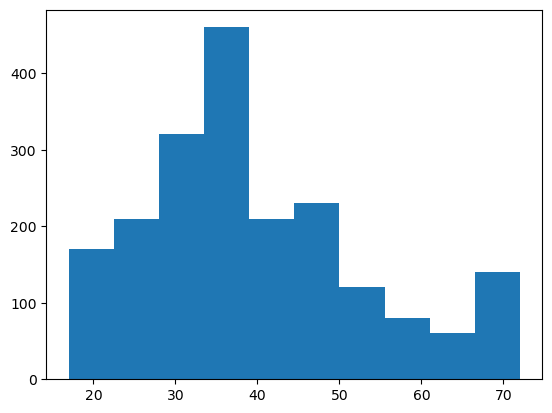

In [17]:
plt.hist(reviews_clean['age'])

Age is approximately normally distributed but with some distinct skewness

### Spending vs Loyalty

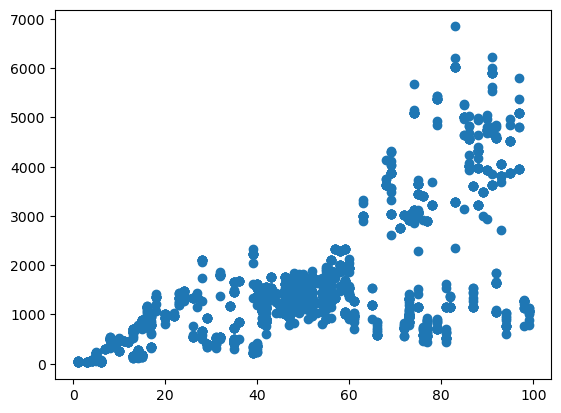

In [18]:
# Define the dependent variable.
y = reviews_clean['loyalty_points'] 

# Define the independent variable.
x = reviews_clean['spending_score'] 

# Check for homoscedasticity with Matplotlib.
plt.scatter(x, y)

#### They do not appear to be linearly related, but will proceed with fitting the model to explore the data

In [19]:
# OLS model and summary.
# Run the OLS model on the data.
f = 'y ~ x'
test = ols(f, data = reviews_clean).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        14:35:52   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [21]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -75.052663.
y_pred = (-75.052663) + 33.061693 * reviews_clean['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

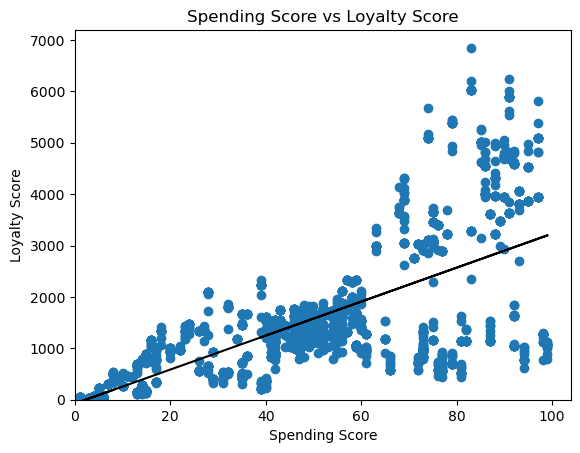

In [22]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add labels
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Score")
plt.title("Spending Score vs Loyalty Score")

# Save the figure for use
plt.savefig('Spending Score vs Loyalty Score.png', bbox_inches='tight')

# View the plot.
plt.show()

### Renumeration vs Loyalty

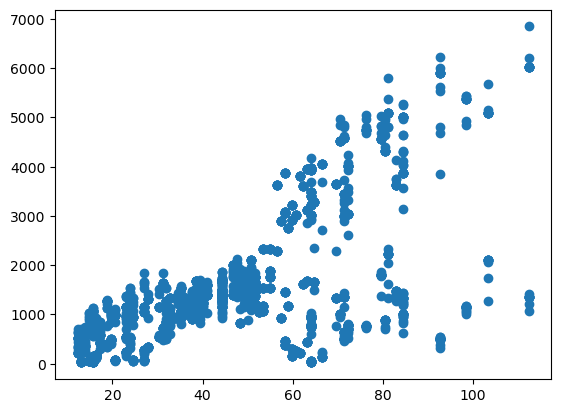

In [23]:
# Define the dependent variable.
y = reviews_clean['loyalty_points'] 

# Define the independent variable.
x = reviews_clean['remuneration'] 

# Check for homoscedasticity with Matplotlib.
plt.scatter(x, y)

#### They also do not appear to be linearly related, but will proceed with fitting the model to explore the data

In [24]:
# OLS model and summary.
# Run the OLS model on the data.
f = 'y ~ x'

test = ols(f, data = reviews_clean).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        14:35:52   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [26]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -75.052663.
y_pred = (-65.686513) + 34.187825 * reviews_clean['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

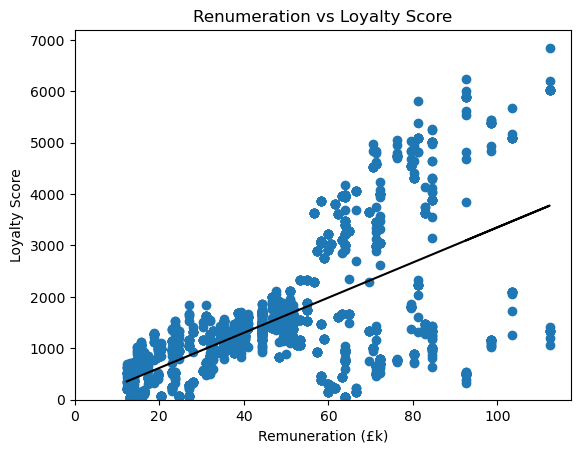

In [27]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add labels
plt.xlabel("Remuneration (£k)")
plt.ylabel("Loyalty Score")
plt.title("Renumeration vs Loyalty Score")

# Save the figure for use
plt.savefig('Renumeration vs Loyalty Score.png', bbox_inches='tight')

# View the plot.
plt.show()

### Age vs Loyalty

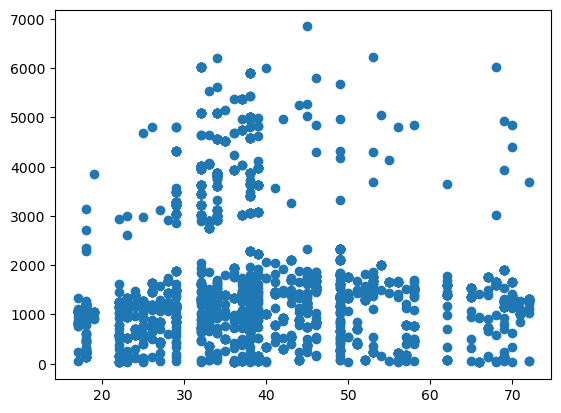

In [28]:
# Define the dependent variable.
y = reviews_clean['loyalty_points'] 

# Define the independent variable.
x = reviews_clean['age'] 

# Check for homoscedasticity with Matplotlib.
plt.scatter(x, y)

#### Quite clearly no correlation, linear regression is not applicable here

### Age vs Spending

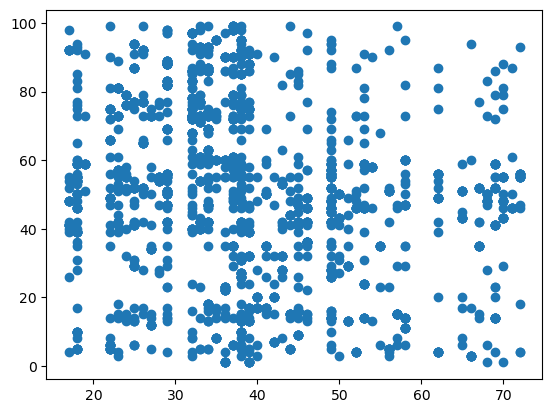

In [29]:
# Define the dependent variable.
y = reviews_clean['spending_score'] 

# Define the independent variable.
x = reviews_clean['age'] 

# Check for homoscedasticity with Matplotlib.
plt.scatter(x, y)

#### Again, quite clearly no correlation, linear regression is not applicable here

### Renumeration vs Spending

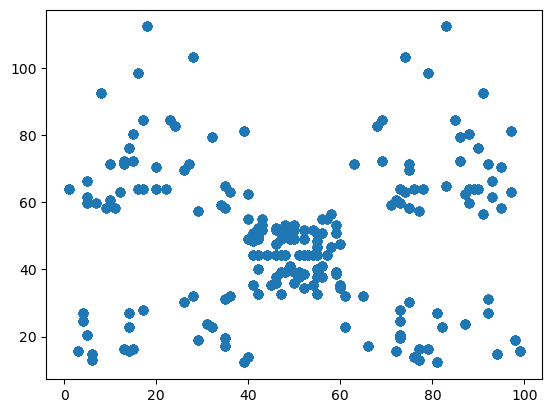

In [30]:
# Define the dependent variable.
y = reviews_clean['remuneration'] 

# Define the independent variable.
x = reviews_clean['spending_score'] 

# Check for homoscedasticity with Matplotlib.
plt.scatter(x, y)

#### Again, quite clearly no correlation, linear regression is not applicable here

## Multiple linear regression with Spending/Remuneration and Loyalty

In [31]:
# Define the dependent variable.
y = reviews_clean['loyalty_points']  

# Define the independent variables.
X = reviews_clean[['spending_score', 'remuneration']] 

In [32]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [33]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [34]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.826913470198926
Intercept:  -1700.3050970144366
Coefficients:


[('spending_score', 32.89269468782098), ('remuneration', 33.979498821802835)]

In [35]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [36]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     3665.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:53   Log-Likelihood:                -12292.
No. Observations:                1600   AIC:                         2.459e+04
Df Residuals:                    1597   BIC:                         2.461e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3810     40.400    -42.

In [37]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [38]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr)) 

Prediction for train set: [ 1218.46660121   618.29301891  2312.04851244 ...  1452.7136095
 -1006.77936277  1203.19986663]


In [39]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [ 1.43311406e+03  3.38498142e+03  1.68174774e+03  1.59972741e+03
  1.05209014e+03  1.17026310e+03  3.41036952e+03  1.05209014e+03
  3.25925979e+03  2.23910009e+03 -2.03602914e+02  4.81806858e+02
  1.25121581e+02  1.20319987e+03  1.26907340e+03  1.41158500e+03
  1.19739315e+02  1.56679064e+03  3.16711810e+03  2.23910009e+03
  1.66560094e+03  2.08389444e+03  1.45271361e+03 -6.55239460e+02
  4.41052339e+03  2.99705200e+03  3.41317910e+03  1.56550430e+03
 -7.15730728e+02  1.57819835e+03  1.44645128e+03  4.20816370e+03
  1.32804143e+03  3.89839558e+03  1.23677981e+03  1.99022952e+03
 -1.11461224e+02  6.96217428e+02  2.16117568e+03  8.16556791e+02
  1.73749992e+03  9.49827093e+02  1.03313377e+03  1.56679064e+03
 -8.46834623e+02  1.50027394e+03  1.21332123e+03  1.67162638e+03
 -1.06188836e+03  1.61651738e+03  1.53063802e+03 -1.07803516e+03
  3.01793790e+03  1.60703919e+03 -2.52956378e+00  1.59908424e+03
  1.41287134e+03  1.21846660e+03  1.40877542e+03  3.93735779e+03


In [40]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

84.27307474340161


In [41]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  

# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0        9.45           const
1        1.00  spending_score
2        1.00    remuneration


In [42]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 446.67056349246894
Mean Square Error (Final): 323161.11611347913


## 6. Observations and insights

Out of Loyalty Points, Spending Score, Renumeration, and Age only Age was approximately normally distributed.

Simple linear regression: Using Spending Score is better than using Remuneration to predict Loyalty Points.

Multiple linear regression: Using both Spending Score and Renumeration together showed an improvement in predicting Loyalty Points and the independent variables were shown to not be multicollinear. However, the expected errors with this prediction are quite large so it should only be done with caution.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [43]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load the CSV file(s) as df2.
# Import new CSV file with Pandas.
# Load the CSV file(s) as reviews.
df2 = pd.read_csv('reviews_cleaned.csv')

# View the DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [45]:
# Drop unnecessary columns.
df2 = df2.drop(['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'], axis=1)

# View DataFrame to check columns correctly dropped.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [46]:
# Descriptive statistics.
df2.describe().round(2)

,remuneration,spending_score
count,2000.00,2000.00
mean,48.08,50.00
std,23.12,26.09
min,12.30,1.00
25%,30.34,32.00
50%,47.15,50.00
75%,63.96,73.00
max,112.34,99.00


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

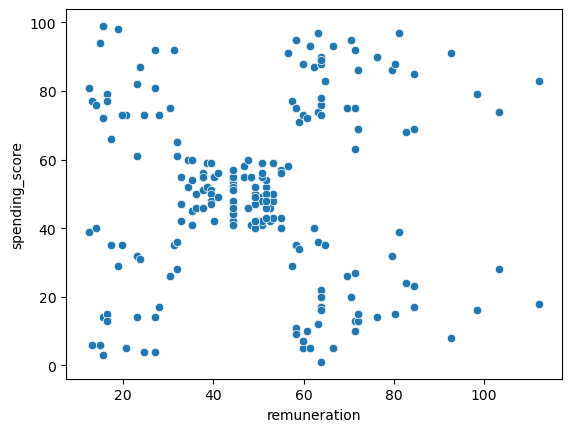

In [47]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

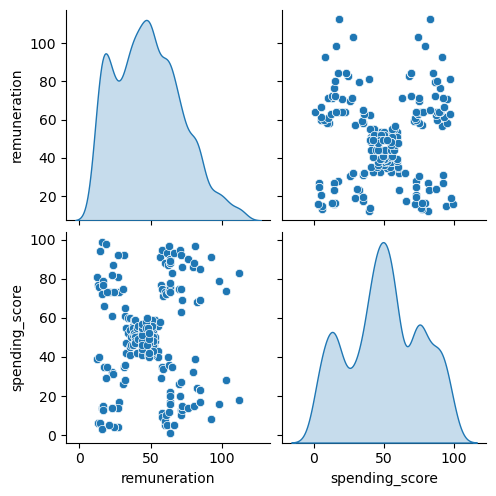

In [48]:
# Create a pairplot with Seaborn.
x_pair = df2[['remuneration', 'spending_score']]

# Plot the pairplot
sns.pairplot(df2,
             vars=x_pair,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

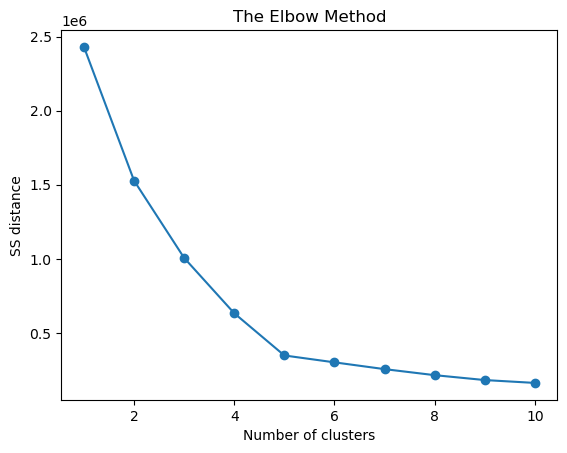

In [49]:
# Determine the number of clusters: Elbow method.
# Imported the KMeans class at top of notebook.

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

Elbow appears to be at 5 clusters

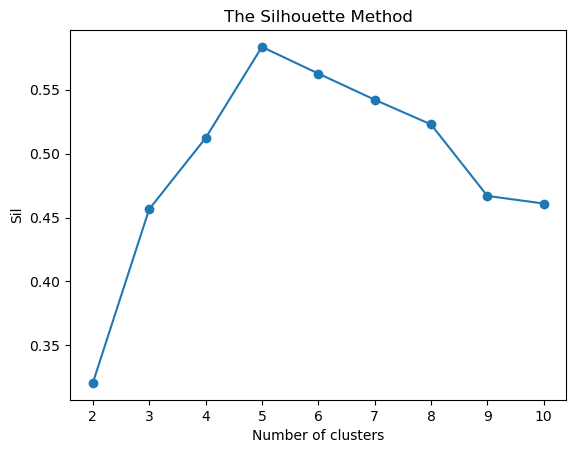

In [50]:
# Determine the number of clusters: Silhouette method.


# Imported silhouette_score class from sklearn at top of notebook.


# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Silhouette Method also suggests 5 clusters

## 4. Evaluate k-means model at different values of *k*

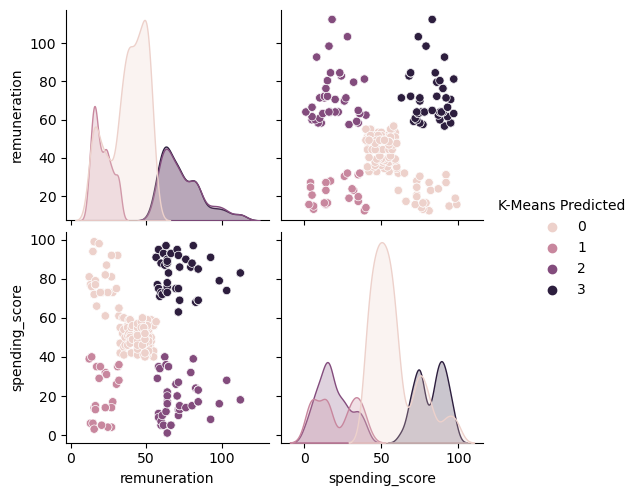

In [51]:
# Test 4 clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

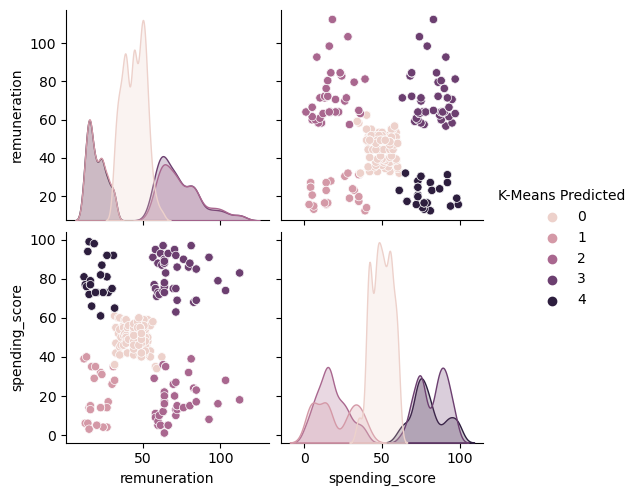

In [52]:
# Test 5 clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

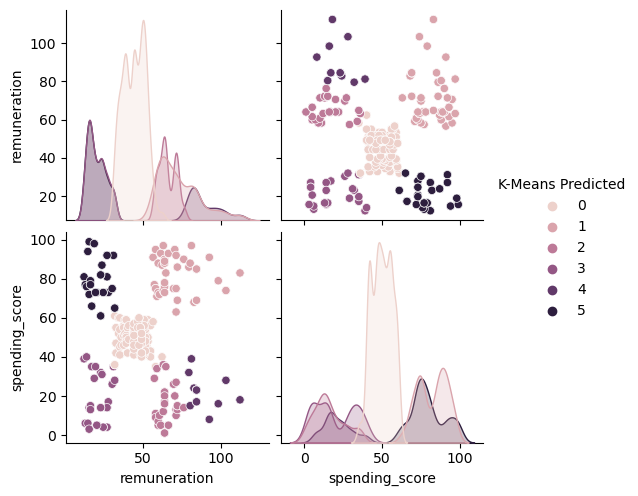

In [53]:
# Test 6 clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

In [54]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

In [55]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

More than double as many points in the largest cluster, but they are tightly packed there

## 6. Plot and interpret the clusters

In [56]:
# View the DataFrame.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


In [57]:
# Rename K-Means Predicted column
df2.rename({'K-Means Predicted': 'Group'}, axis=1, inplace=True)

In [58]:
# Add 1 to each Group value so they go from 1-5
df2['Group'] = df2['Group'] + 1

df2

,remuneration,spending_score,Group
0,12.30,39,5
1,12.30,81,4
2,13.12,6,5
3,13.12,77,4
4,13.94,40,5
...,...,...,...
1995,84.46,69,1
1996,92.66,8,3
1997,92.66,91,1
1998,98.40,16,3


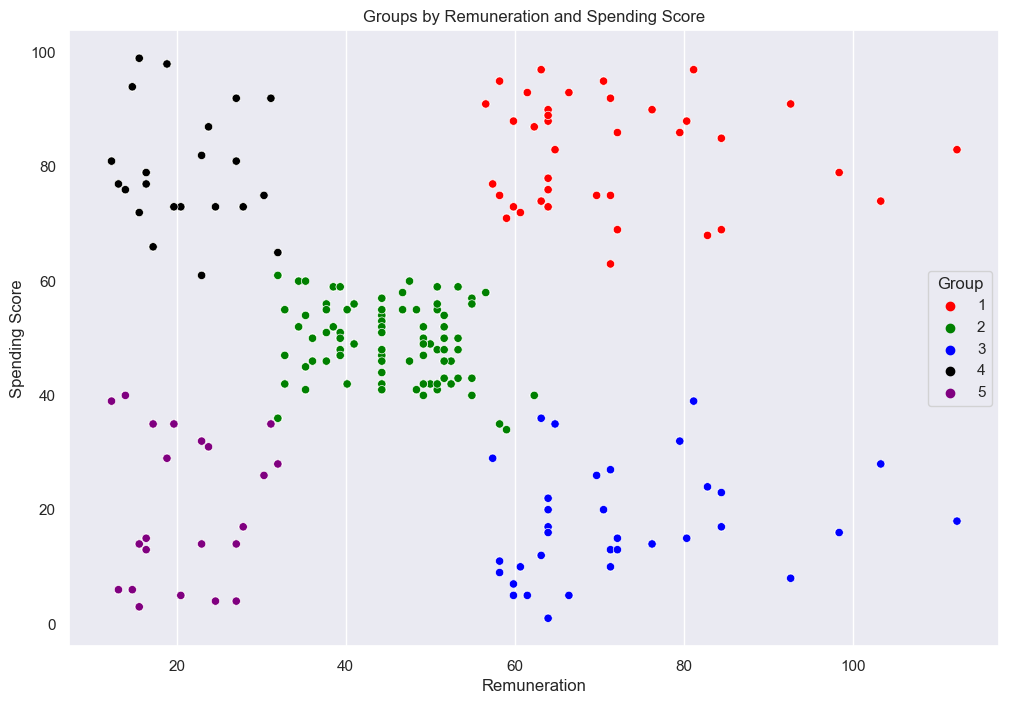

In [59]:
# Visualising the clusters.

# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2,
                hue='Group',
                palette=['red', 'green', 'blue', 'black', 'purple'])
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")
plt.title("Groups by Remuneration and Spending Score")
plt.grid(axis='y')

plt.savefig('Groups by Remuneration and Spending Score.png', bbox_inches='tight')

## 7. Discuss: Insights and observations


Renumeration and Spending Score were compared using a pair plot. This initially suggested a possible five groups.
They were then compared using Kmeans clustering to identify and test the appropriate number of groups. The Elbow and Silhouette methods both indicated five clusters as well. To confirm this, three options were tested with four, five and six clusters. Five clusters was identified as the best option:

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [60]:
# !pip install textblob

In [61]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [62]:
# Load the data set as df3.
df3 = pd.read_csv('reviews_cleaned.csv')

# View the DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [63]:
# Determine if there are any missing values.
df3_na = df3[df3.isna().any(axis=1)]

# View the shape of the DataFrame.
df3_na.shape

(0, 9)

No missing data

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [64]:
# Review: Change both review and summary to lower case and join with a space.
df3['review'] = df3['review'].str.lower()
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,an open letter to galeforce9*:\n\nyour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,amazing buy! bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,as my review of gf9's previous screens these w...,Money trap


In [65]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].str.lower()
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,Female,22,13.12,6,40,graduate,254,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,amazing buy! bought it as a gift for our new d...,five stars
4,Female,33,13.94,40,366,graduate,291,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [66]:
# Replace all the punctuations in review column.
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df3["review"] = df3['review'].apply(remove_punctuations)
# View output.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon master's screen from...
2,Female,22,13.12,6,40,graduate,254,nice art nice printing why two panels are fil...,"pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,amazing buy bought it as a gift for our new dm...,five stars
4,Female,33,13.94,40,366,graduate,291,as my review of gf9s previous screens these we...,money trap


In [67]:
# Replace all the puncuations in summary column.
df3["summary"] = df3['summary'].apply(remove_punctuations)
# View output.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,Male,23,12.30,81,524,graduate,466,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,Female,22,13.12,6,40,graduate,254,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,Female,25,13.12,77,562,graduate,263,amazing buy bought it as a gift for our new dm...,five stars
4,Female,33,13.94,40,366,graduate,291,as my review of gf9s previous screens these we...,money trap


### 2c) Drop duplicates in both columns

If duplicates were searched for only based on the review and summary column then two different customers with identical reviews would be considered a duplicate. At this point, I kept all columns in df3 until after this duplicate stage. 

In [68]:
# Check for duplicates
df3[df3.duplicated(['review', 'summary'])]

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
94,Female,34,49.20,42,1376,graduate,6721,great,five stars
326,Male,41,58.22,35,1463,graduate,2849,love it,five stars
371,Male,32,71.34,75,3455,diploma,5726,great,five stars
404,Female,33,13.94,40,366,graduate,977,good,five stars
408,Male,66,15.58,3,31,PhD,1459,great,five stars
416,Female,37,17.22,35,417,graduate,830,love it,five stars
430,Male,62,24.60,4,69,PhD,2173,love it,five stars
576,Male,57,72.16,15,787,graduate,7141,great,five stars
810,Male,69,15.58,14,138,diploma,1175,great game,five stars
811,Female,37,15.58,99,1067,postgraduate,1183,great game,five stars


To have some granularity, checked for duplicates with matching product, review and summary

In [69]:
# Check for actual likely duplicates with same product
df3[df3.duplicated(['product', 'review', 'summary'])]

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
1006,Female,37,14.76,6,61,diploma,1183,great game,five stars


In [70]:
df3[df3.duplicated(['product', 'review', 'summary'], keep='last')]

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
811,Female,37,15.58,99,1067,postgraduate,1183,great game,five stars


Both female and aged 37, so will remove one duplicate

In [71]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['product', 'review', 'summary'], keep='first')

# Confirm duplicated review is dropped.
df3[df3.duplicated(['product', 'review', 'summary'])]

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary


Now additional columns can be dropped safely having been used to check for duplicates

In [72]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product'], axis=1)

# View DataFrame to check columns correctly dropped.
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [73]:
# Create new DataFrame (copy DataFrame).
df_rev = df3['review'].values

# View DataFrame.
df_rev

array(['when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely',
       'an open letter to galeforce9\n\nyour unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overl

In [74]:
# Create new DataFrame (copy DataFrame).
df_sum = df3['summary'].values

# View DataFrame.
df_sum

array(['the fact that 50 of this space is wasted on art and not terribly informative or needed art ',
       'another worthless dungeon masters screen from galeforce9',
       'pretty but also pretty useless', ..., 'great game', 'four stars',
       'love this game'], dtype=object)

In [75]:
# Import nltk and the required resources.
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\logil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\logil\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [76]:
# Get a list of all english words so we can exclude anything that doesn't appear on the list.
all_english_words = set(words.words())

In [77]:
# Apply tokenisation to both columns.
df_rev2 = [word_tokenize(_) for _ in df_rev]
df_sum2 = [word_tokenize(_) for _ in df_sum]

# Remove stop_words
list_rev = [[y.lower() for y in x if y.lower() not in stop_words and
            y.isalpha() and y.lower() in all_english_words] for
           x in df_rev2]

list_sum = [[y.lower() for y in x if y.lower() not in stop_words and
            y.isalpha() and y.lower() in all_english_words] for
           x in df_sum2]

# View list created for reviews
list_rev

[['comes',
  'screen',
  'space',
  'screen',
  'absolute',
  'premium',
  'fact',
  'space',
  'wasted',
  'art',
  'terribly',
  'informative',
  'art',
  'well',
  'completely',
  'useless',
  'reason',
  'gave',
  'technically',
  'speaking',
  'least',
  'still',
  'stand',
  'block',
  'dice',
  'ball',
  'completely'],
 ['open',
  'letter',
  'unpainted',
  'bad',
  'spell',
  'great',
  'board',
  'however',
  'terrible',
  'still',
  'waiting',
  'single',
  'screen',
  'polluted',
  'pointless',
  'useful',
  'tables',
  'youve',
  'single',
  'use',
  'screen',
  'useful',
  'running',
  'storm',
  'thunder',
  'adventure',
  'even',
  'despite',
  'fact',
  'geared',
  'adventure',
  'path',
  'usefulness',
  'negligible',
  'best',
  'massive',
  'swath',
  'inner',
  'panel',
  'wasted',
  'bloated',
  'overland',
  'map',
  'could',
  'easily',
  'reduced',
  'single',
  'panel',
  'size',
  'table',
  'short',
  'stop',
  'making',
  'crap'],
 ['nice',
  'art',
  'nice'

In [78]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [79]:
# Create strings for word clouds.
str_wc_rev = ' '.join(str(x) for x in list_rev)
str_wc_sum = ' '.join(str(x) for x in list_sum)

In [80]:
# Remove apostrophes from strings
str_wc_rev = str_wc_rev.replace("'", "")
str_wc_sum = str_wc_sum.replace("'", "")

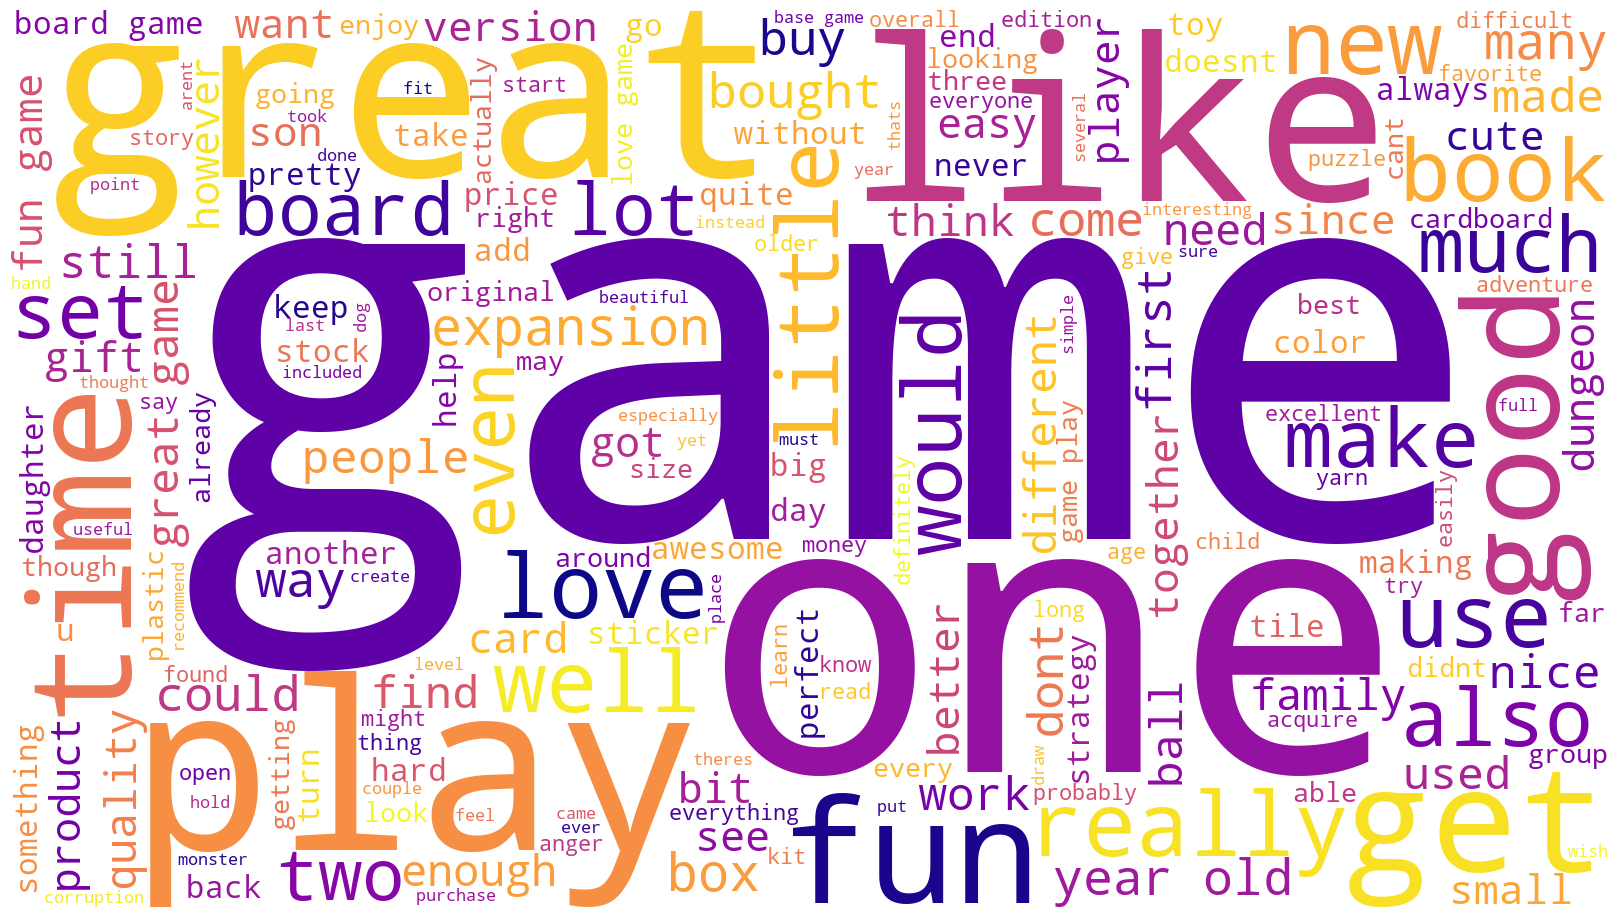

In [81]:
# Review: Plot the WordCloud image.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(str_wc_rev) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

Wordcloud is very busy with too many words on it, try reducing total

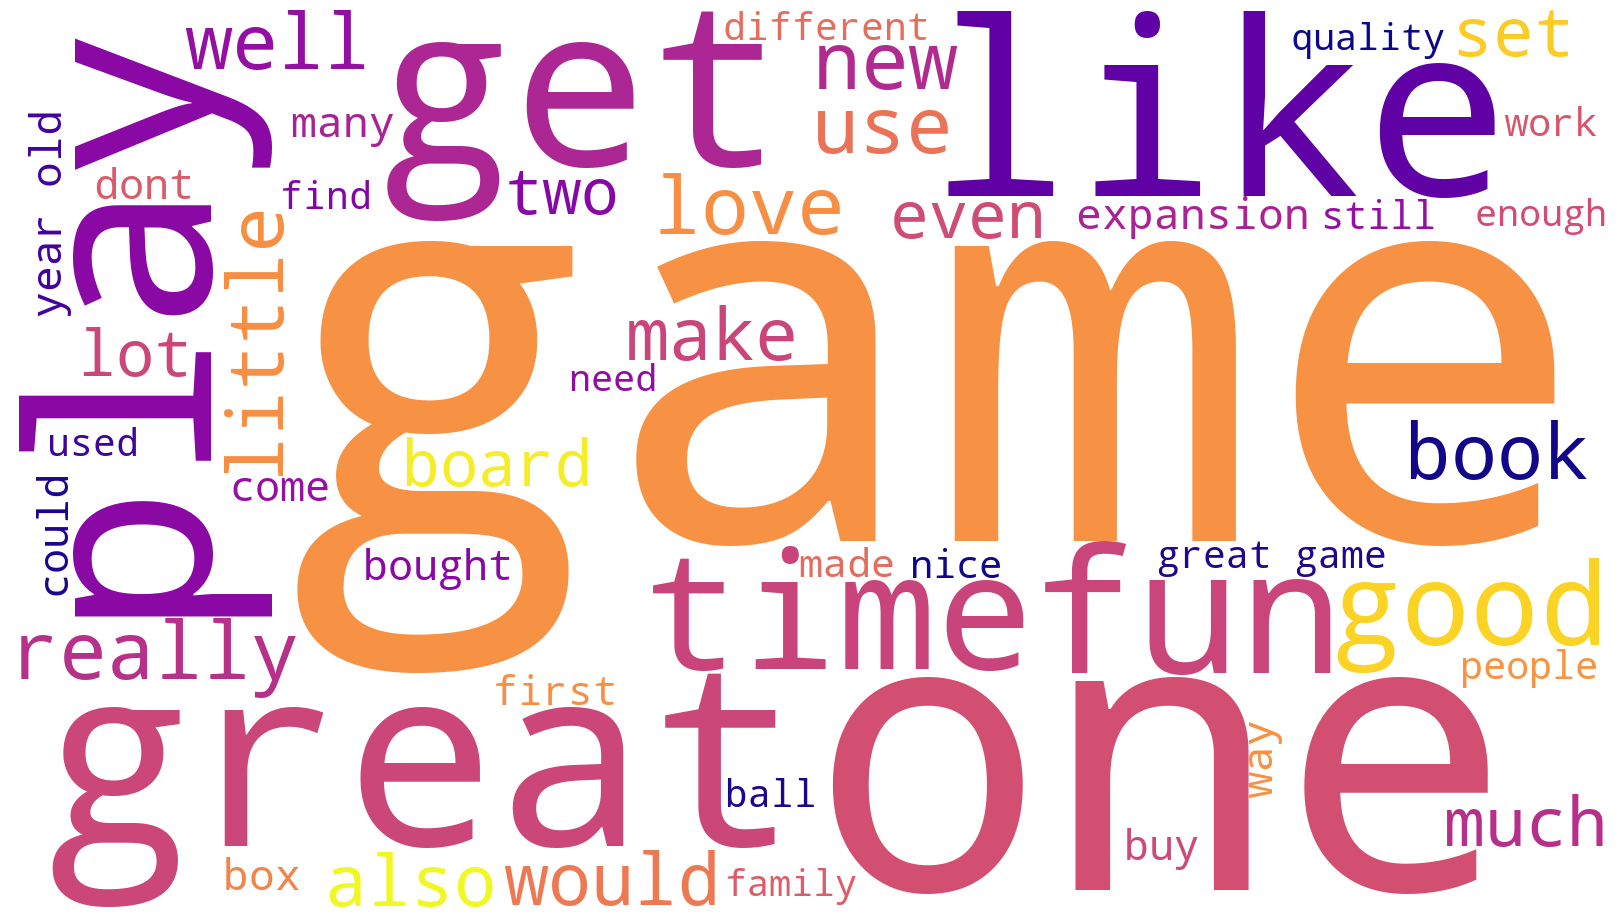

In [82]:
# Review: Plot the Review WordCloud image.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                max_words = 50,
                min_font_size = 10).generate(str_wc_rev) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

plt.savefig('Word Cloud.png', bbox_inches='tight')

plt.show()

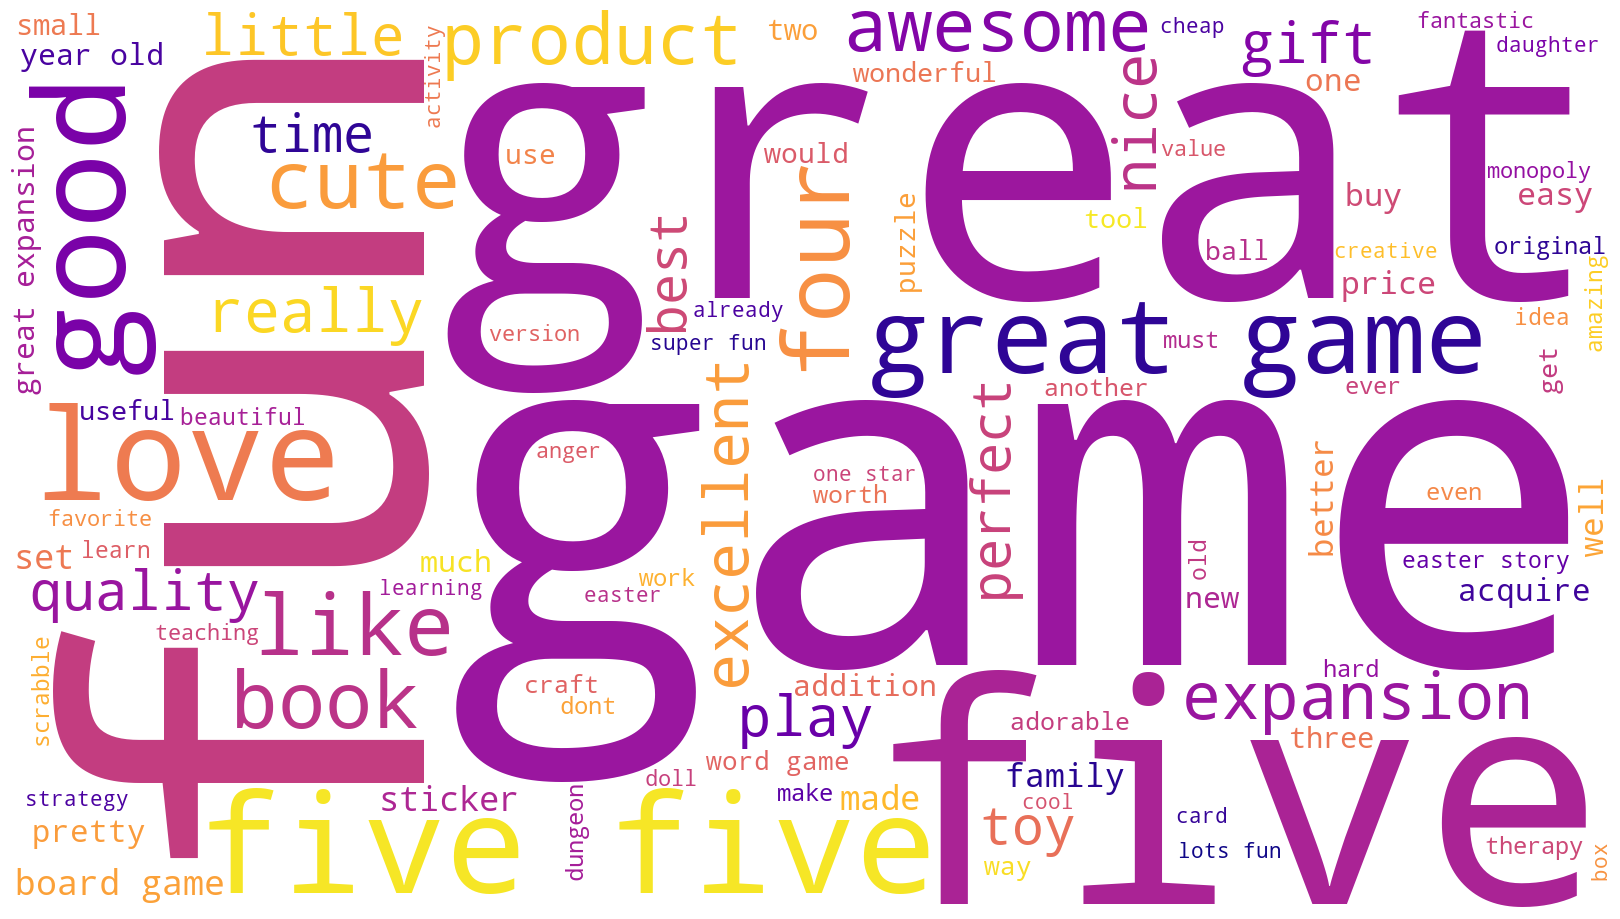

In [83]:
# Review: Plot the Summary WordCloud image.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                max_words = 100,
                min_font_size = 10).generate(str_wc_sum) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [84]:
# Import Counter for frequency of words in Review and Summary
from collections import Counter

# Create lists of the 15 most common words in Review and Summary
rev_freq_list = Counter(str_wc_rev.split()).most_common(15)
sum_freq_list = Counter(str_wc_sum.split()).most_common(15)

# Print these for the Reviews
for word, count in rev_freq_list:
    print(word, count)

game, 1472
one, 486
play, 458
fun, 412
like, 368
great, 350
get, 310
would, 270
really, 268
time, 262
new, 255
book, 246
good, 240
well, 237
board, 236


In [85]:
# Turn these lists into data frames
rev_word_freq = pd.DataFrame(rev_freq_list, columns = ['word', 'frequency'])
sum_word_freq = pd.DataFrame(sum_freq_list, columns = ['word', 'frequency'])

# View the Review word frequency data frame
rev_word_freq

,word,frequency
0,"game,",1472
1,"one,",486
2,"play,",458
3,"fun,",412
4,"like,",368
5,"great,",350
6,"get,",310
7,"would,",270
8,"really,",268
9,"time,",262


In [86]:
# Remove ','s from word columns
rev_word_freq['word'] = rev_word_freq['word'].str.replace(',', '')
sum_word_freq['word'] = sum_word_freq['word'].str.replace(',', '')

rev_word_freq

,word,frequency
0,game,1472
1,one,486
2,play,458
3,fun,412
4,like,368
5,great,350
6,get,310
7,would,270
8,really,268
9,time,262


In [87]:
# Check Summary data frame as well
sum_word_freq

,word,frequency
0,[five],378
1,[great,223
2,game],175
3,game,122
4,[fun,103
5,[good,60
6,[],59
7,[four],57
8,fun],48
9,[love,46


In [88]:
# Remove [ and ]
sum_word_freq['word'] = sum_word_freq['word'].str.replace('[', '')
sum_word_freq['word'] = sum_word_freq['word'].str.replace(']', '')

In [89]:
# Check Summary data frame as well
sum_word_freq

,word,frequency
0,five,378
1,great,223
2,game,175
3,game,122
4,fun,103
5,good,60
6,,59
7,four,57
8,fun,48
9,love,46


7th row appears blank, this indicates summaries that didn't include any non-stopwords in English

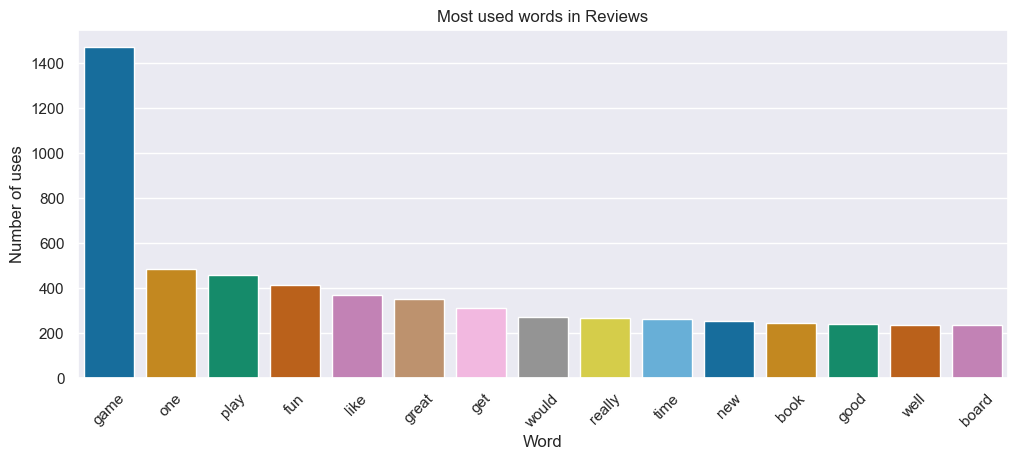

In [90]:
# Create a Seaborn barplot showing top 15 words used in reviews.
fig_words_rev, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='word',
            y='frequency',
            data=rev_word_freq,
            palette="colorblind",
            ax=ax)
ax.set_title('Most used words in Reviews')
ax.set_xlabel('Word')
ax.set_ylabel('Number of uses')
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='center')
plt.subplots_adjust(bottom=0.3)
plt.style.context(("tableau-colorblind10"))

fig_words_rev.savefig("Most used words in reviews.png", bbox_inches='tight')

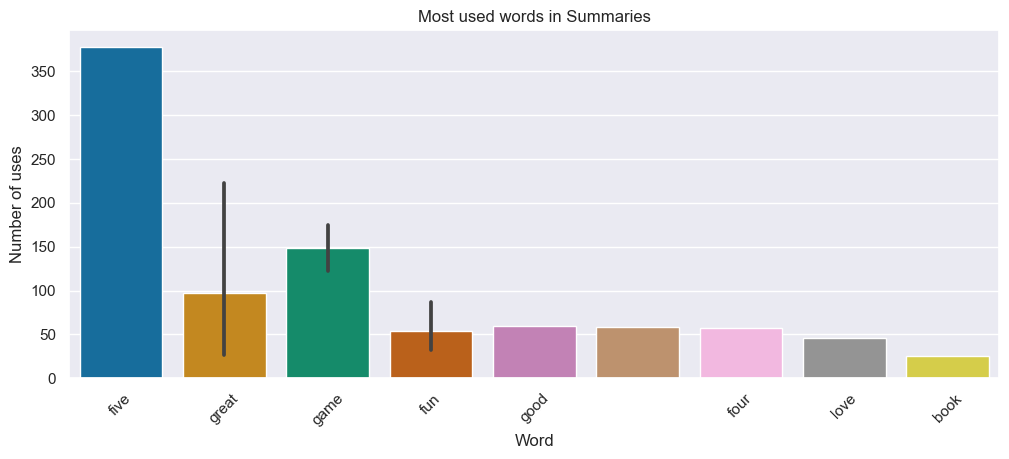

In [91]:
# Create a Seaborn barplot showing top 15 words used in reviews.
fig_words_sum, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='word',
            y='frequency',
            data=sum_word_freq,
            palette="colorblind",
            ax=ax)
ax.set_title('Most used words in Summaries') #, fontdict=title_font)
ax.set_xlabel('Word') #, fontdict=font)
ax.set_ylabel('Number of uses') #, fontdict=font)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='center')
plt.subplots_adjust(bottom=0.3)
plt.style.context(("tableau-colorblind10"))

In [92]:
# Obtain a list of the words for sentitment analysis
rev_words = rev_word_freq['word']

rev_words

0       game
1        one
2       play
3        fun
4       like
5      great
6        get
7      would
8     really
9       time
10       new
11      book
12      good
13      well
14     board
Name: word, dtype: object

In [93]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\logil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

In [95]:
# Run the polarity score function on the words.
# This will return four values in a dictionary

rev_dict_polarity = {"".join(_) : sia.polarity_scores("".join(_)) for _ in rev_words}

rev_dict_polarity

{'game': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'one': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'play': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.34},
 'fun': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106},
 'like': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612},
 'great': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249},
 'get': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'would': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'really': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'time': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'new': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'book': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'good': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 'well': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732},
 'board': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}

In [96]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
rev_polarity = pd.DataFrame(rev_dict_polarity).T

# View the DataFrame.
rev_polarity

,neg,neu,pos,compound
game,0.0,1.0,0.0,0.0000
one,0.0,1.0,0.0,0.0000
play,0.0,0.0,1.0,0.3400
fun,0.0,0.0,1.0,0.5106
like,0.0,0.0,1.0,0.3612
great,0.0,0.0,1.0,0.6249
get,0.0,1.0,0.0,0.0000
would,0.0,1.0,0.0,0.0000
really,0.0,1.0,0.0,0.0000
time,0.0,1.0,0.0,0.0000


In [97]:
# Rename compound column to be clearer
rev_polarity.rename(columns = {'compound':'sentiment'}, inplace = True)

In [98]:
# Set index of word_freq for easier concat
rev_word_freq = rev_word_freq.set_index('word', drop= True)

In [99]:
# Concat the two data frames into one
rev_word_polarity = pd.concat([rev_word_freq, rev_polarity], axis=1)

# View the words and 
rev_word_polarity

,frequency,neg,neu,pos,sentiment
game,1472,0.0,1.0,0.0,0.0000
one,486,0.0,1.0,0.0,0.0000
play,458,0.0,0.0,1.0,0.3400
fun,412,0.0,0.0,1.0,0.5106
like,368,0.0,0.0,1.0,0.3612
great,350,0.0,0.0,1.0,0.6249
get,310,0.0,1.0,0.0,0.0000
would,270,0.0,1.0,0.0,0.0000
really,268,0.0,1.0,0.0,0.0000
time,262,0.0,1.0,0.0,0.0000


Sentiment analysis on singular words is of very little use without the context around them. As such, not repeated for summaries.

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [100]:
# Load the data set as df4.
df4 = pd.read_csv('reviews_cleaned.csv')

# View the DataFrame.
df4.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [101]:
# Keep necessary columns. Drop unnecessary columns.
df4 = df4.drop(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product'], axis=1)

# View DataFrame to check columns correctly dropped.
df4.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [102]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment.polarity

def generate_subjectivity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment.subjectivity

In [103]:
# Determine polarity of both columns. 
df4['review_polarity'] = df4['review'].apply(generate_polarity)
df4['review_subjectivity'] = df4['review'].apply(generate_subjectivity)

df4['summary_polarity'] = df4['summary'].apply(generate_polarity)
df4['summary_subjectivity'] = df4['summary'].apply(generate_subjectivity)

# View output.
df4.head()

,review,summary,review_polarity,review_subjectivity,summary_polarity,summary_subjectivity
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,-0.036111,0.486111,0.15,0.500000
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,0.035952,0.442976,-0.80,0.900000
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",0.116640,0.430435,0.00,0.733333
3,Amazing buy! Bought it as a gift for our new d...,Five Stars,0.628788,0.784848,0.00,0.000000
4,As my review of GF9's previous screens these w...,Money trap,-0.316667,0.316667,0.00,0.000000


In [104]:
# Reset plot style
plt.style.use(['default'])

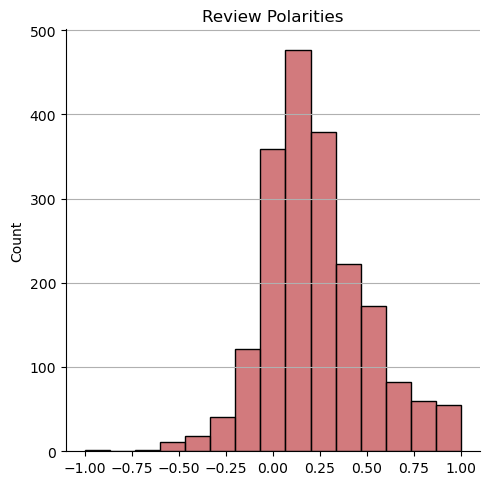

In [105]:
# Review: Create a histogram plot with bins = 15.

# Histogram of review polarity
sns.displot(df4, x="review_polarity", bins=15, color='r')
plt.xlabel("")
plt.title("Review Polarities")
plt.grid(axis='y')

plt.savefig('Review Polarities.png', bbox_inches='tight')

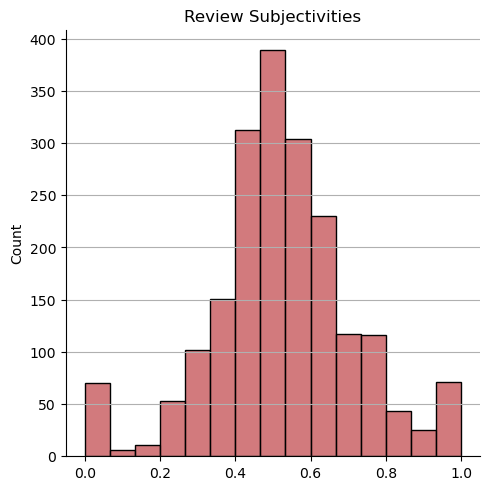

In [106]:
# Review: Create a histogram plot with bins = 15.

# Histogram of review subjectivity
sns.displot(df4, x="review_subjectivity", bins=15, color='r')
plt.xlabel("")
plt.title("Review Subjectivities")
plt.grid(axis='y')

plt.savefig('Review Subjectivities.png', bbox_inches='tight')

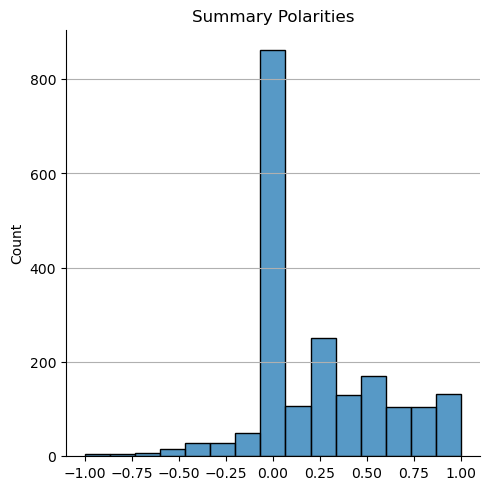

In [107]:
# Summary: Create a histogram plot with bins = 15.


# Histogram of summary polarities
sns.displot(df4, x="summary_polarity", bins=15)
plt.xlabel("")
plt.title("Summary Polarities")
plt.grid(axis='y')

plt.savefig('Summary Polarities.png', bbox_inches='tight')

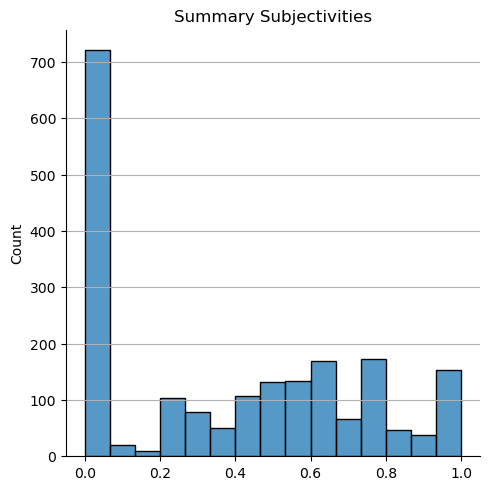

In [108]:
# Histogram of summary subjectivities
sns.displot(df4, x="summary_subjectivity", bins=15)
plt.xlabel("")
plt.title("Summary Subjectivities")
plt.grid(axis='y')

plt.savefig('Summary Subjectivities.png', bbox_inches='tight')

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [109]:
# Top 20 negative reviews.
df4_neg_rev = df4.sort_values(['review_polarity'], ascending = [True])

worst_reviews = df4_neg_rev[['review','review_polarity', 'review_subjectivity']].head(20)

# Save as CSV
worst_reviews.to_csv('worst_reviews.csv', index=True)

# View output.
worst_reviews

,review,review_polarity,review_subjectivity
208,BOOO UNLES YOU ARE PATIENT KNOW HOW TO MEASUR...,-1.000000,1.000000
182,Incomplete kit! Very disappointing!,-0.975000,0.910000
989,"If you, like me, used to play D&D, but now you...",-0.625000,0.400000
1804,I'm sorry. I just find this product to be bori...,-0.583333,0.750000
364,"One of my staff will be using this game soon, ...",-0.550000,0.300000
1829,Scrabble in a card game!,-0.500000,0.400000
227,this was a gift for my daughter. I found it d...,-0.500000,1.000000
803,This game is a blast!,-0.500000,0.400000
290,Instructions are complicated to follow,-0.500000,1.000000
301,Difficult,-0.500000,1.000000


In [110]:
# Top 20 negative summaries.
df4_neg_sum = df4.sort_values(['summary_polarity'], ascending = [True])

worst_summaries = df4_neg_sum[['summary','summary_polarity', 'summary_subjectivity']].head(20)

# Save as CSV
worst_summaries.to_csv('worst_summaries.csv', index=True)

# View output.
worst_summaries

,summary,summary_polarity,summary_subjectivity
829,Boring,-1.000,1.000000
21,The worst value I've ever seen,-1.000,1.000000
208,BORING UNLESS YOU ARE A CRAFT PERSON WHICH I A...,-1.000,1.000000
1166,before this I hated running any RPG campaign d...,-0.900,0.700000
1,Another worthless Dungeon Master's screen from...,-0.800,0.900000
1620,Disappointed,-0.750,0.750000
144,Disappointed,-0.750,0.750000
793,Disappointed,-0.750,0.750000
631,Disappointed.,-0.750,0.750000
363,Promotes anger instead of teaching calming met...,-0.700,0.200000


In [111]:
# Top 20 negative reviews.
df4_pos_rev = df4.sort_values(['review_polarity'], ascending = [False])

best_reviews = df4_pos_rev[['review','review_polarity', 'review_subjectivity']].head(20)

# Save as CSV
best_reviews.to_csv('best_reviews.csv', index=True)

# View output.
best_reviews

,review,review_polarity,review_subjectivity
804,great!!,1.0,0.750
418,Great resource for BHIS care coordinators!! Wo...,1.0,0.750
44,Absolutely great pictures even before coloring!,1.0,0.750
933,Awesome,1.0,1.000
1168,best set. buy 2 if you have the means.,1.0,0.300
55,Great!,1.0,0.750
1177,Awesome addition to my rpg GM system.,1.0,1.000
1967,Perfect for tutoring my grandson in spelling.,1.0,1.000
1182,My grandson loved it!!,1.0,0.800
216,Great product! Arrived on time.,1.0,0.750


In [112]:
# Top 20 positive summaries.
df4_pos_sum = df4.sort_values(['summary_polarity'], ascending = [False])

best_summaries = df4_pos_sum[['summary','summary_polarity', 'summary_subjectivity']].head(20)

# Save as CSV
best_summaries.to_csv('best_summaries.csv', index=True)

# View output.
best_summaries

,summary,summary_polarity,summary_subjectivity
1151,Great tile set!,1.0,0.75
508,great!,1.0,0.75
161,Awesome Book...,1.0,1.00
997,Best One in the Series,1.0,0.30
163,He was very happy with his gift,1.0,1.00
1388,Awesome Expansion!,1.0,1.00
707,Great for learning!,1.0,0.75
1642,Excellent teaching tool.,1.0,1.00
1603,Perfect for preschoolers.,1.0,1.00
993,Great box of minis for the price!,1.0,0.75


## 7. Discuss: Insights and observations


Analysing individual words was of limited use as they then lack context.

Process used was good at identifying positive reviews/summaries due to words like "Perfect", "Awesome", "Wonderful", etc.

Process used struggled with identifying negative sentiments as some content is more nuanced; e.g. "This game is a blast!", "If you, like me, used to play D&D, but now you and your friends "growed up" and can't be together because all the responsibilities and bla bla bla... this game is for you! Come to the Dungeon!".

Recommendation; add star rating to help show if reviews are positive or negative.

# 